In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from osgeo import gdal
from glob import glob

In [66]:
# Load any auxiliary functions
from aux_functions import *

In [12]:
# Set path to the images

path = 'C:/Users/artemis.vrettou/Documents/MS/' 

In [15]:
# Go through the path and get all the tiffs
files = glob(path + '*.tiff')
print(files)

['C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff', 'C:/Users/artemis.vrettou/Documents/MS\\2023-

In [49]:
# Create a loop where I go through the files, open each one of them and stack them in a new variable

for i, file in enumerate(files):
    print(file)
    ds = gdal.Open(file)
    data = ds.ReadAsArray()
    if i == 0:
        stacked_data = data
    else:
        stacked_data = np.dstack((stacked_data, data))

C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B01_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B02_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B03_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B04_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B05_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B06_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B07_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B08_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2_L2A_B09_(Raw).tiff
C:/Users/artemis.vrettou/Documents/MS\2023-08-25-00_00_2023-08-25-23_59_Sentinel-2

In [64]:
# Create a function, where I give it the path and then it goes through the files in the path opens the tiffs and stacks them 

def stack_tiffs(path):
    files = glob(path + '*.tiff')
    for i, file in enumerate(files):
        print(file)
        ds = gdal.Open(file)
        data = ds.ReadAsArray()
        if i == 0:
            stacked_data = data
        else:
            stacked_data = np.dstack((stacked_data, data))
    return stacked_data

In [52]:
# Extract bands 2, 3, and 4 (which correspond to indices 1, 2, 3 in Python)
red_band = stacked_data[:, :, 1]   # Band 2 (index 1)
green_band = stacked_data[:, :, 2] # Band 3 (index 2)
blue_band = stacked_data[:, :, 3]  # Band 4 (index 3)


In [53]:
# Normalize the bands to [0, 1] range
max_value = 51930  # Maximum value from your dataset
red_band = red_band / max_value
green_band = green_band / max_value
blue_band = blue_band / max_value

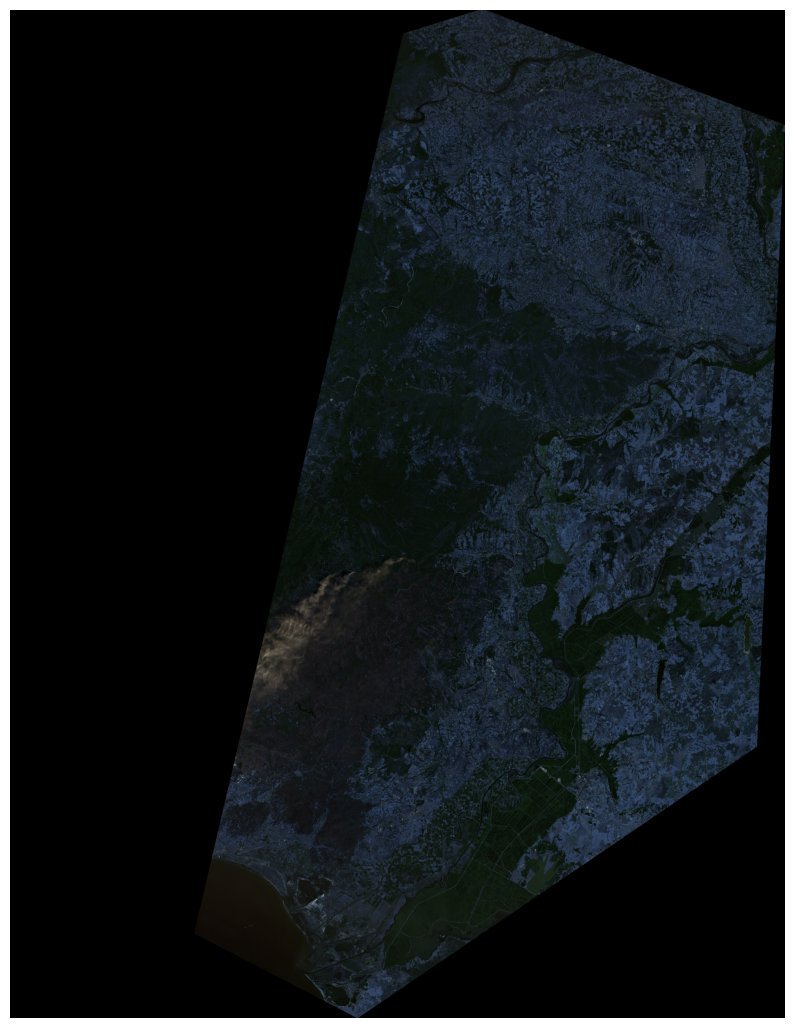

In [58]:

# Stack the extracted bands to create an RGB image
rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Plot the RGB image
plt.figure(figsize=(10, 15))
plt.imshow(rgb_image)
plt.axis('off')  # Hide axis for a cleaner image
plt.show()

In [59]:
# Let's make the false image

# Extract bands 5, 4, and 3 (which correspond to indices 4, 3, 2 in Python)
nir_band = stacked_data[:, :, 4]   # Band 5 (index 4)
swir1_band = stacked_data[:, :, 3] # Band 4 (index 3)
swir2_band = stacked_data[:, :, 2]  # Band 3 (index 2)

In [60]:
# Normalize the bands to [0, 1] range
max_value = 51930  # Maximum value from your dataset
nir_band = nir_band / max_value
swir1_band = swir1_band / max_value
swir2_band = swir2_band / max_value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2619872905834777].


(np.float64(-0.5), np.float64(1921.5), np.float64(2499.5), np.float64(-0.5))

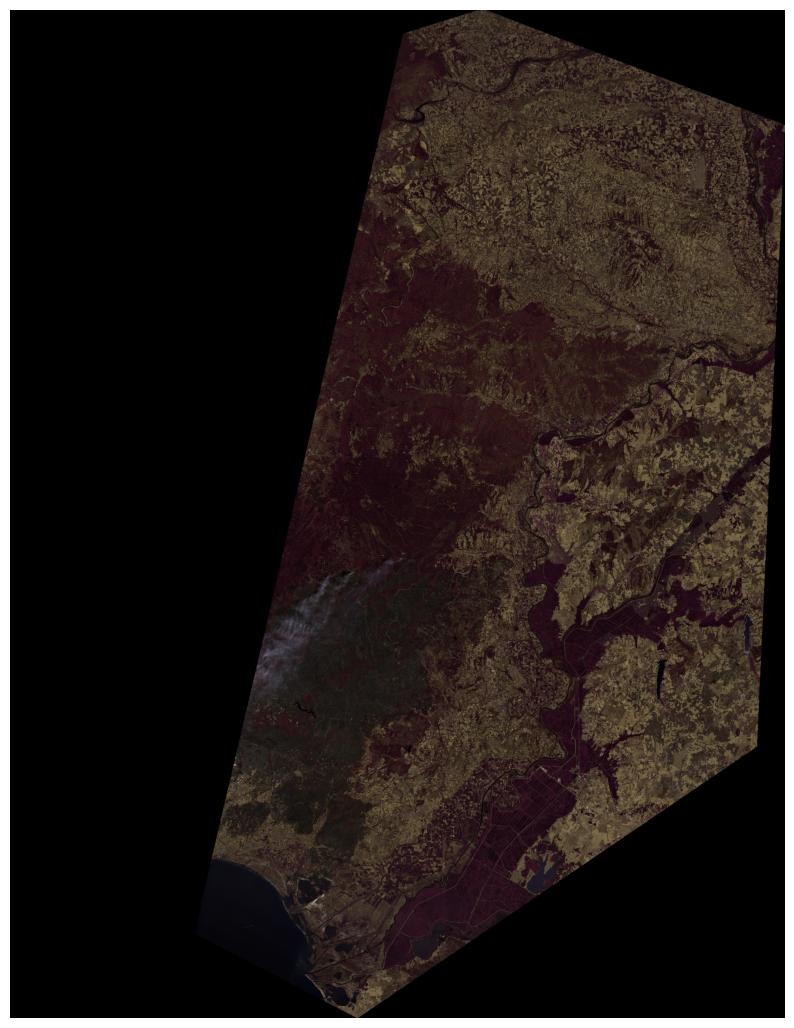

In [61]:
# Stack the extracted bands and create a false-color image

false_image = np.stack((nir_band, swir1_band, swir2_band), axis=-1)

# Plot the false-color image
plt.figure(figsize=(10, 15))
plt.imshow(false_image)
plt.axis('off')  # Hide axis for a cleaner image


In [62]:
# Create a function that does what we did above. I am assuming that the full banded images is already loaded, so our beginning is stacked data 

def visualize(data, band1, band2, band3):
    # Extract bands
    band1 = data[:, :, band1]
    band2 = data[:, :, band2]
    band3 = data[:, :, band3]
    
    # Normalize the bands to [0, 1] range
    max_value = band1.max()  # Maximum value from your dataset
    band1 = band1 / max_value
    band2 = band2 / max_value
    band3 = band3 / max_value
    
    # Stack the extracted bands to create an RGB image
    rgb_image = np.stack((band1, band2, band3), axis=-1)
    
    # Plot the RGB image
    plt.figure(figsize=(10, 15))
    plt.imshow(rgb_image)
    plt.axis('off')  # Hide axis for a cleaner image
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0653400348753719].


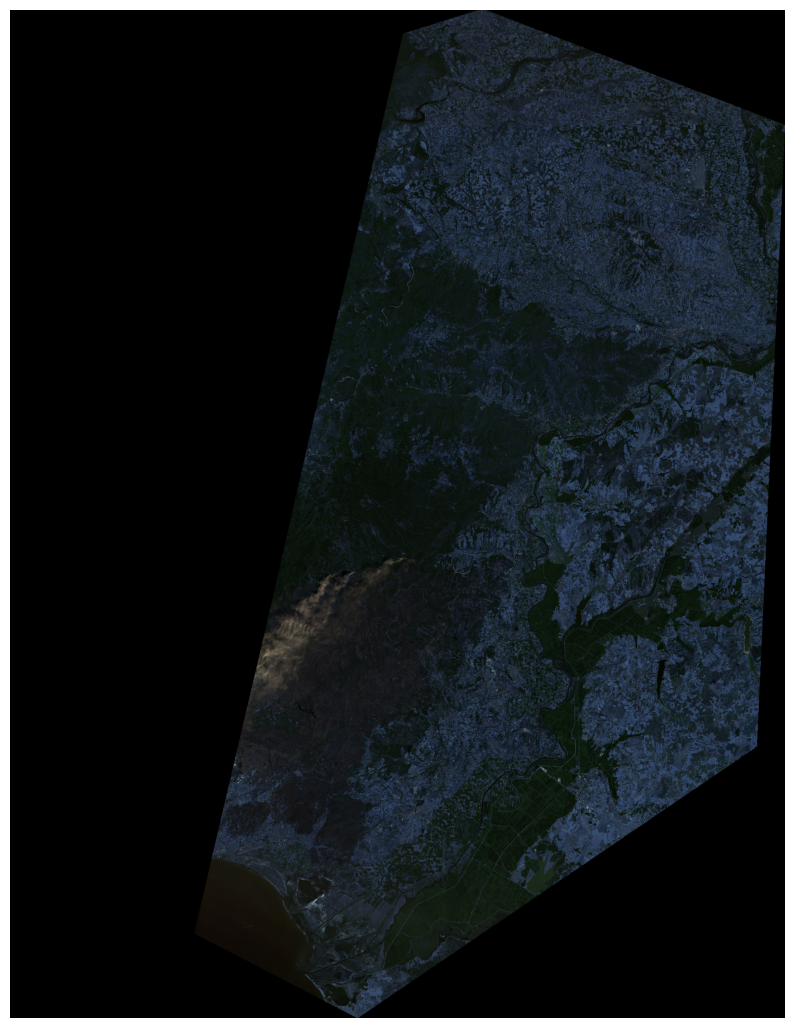

In [63]:
visualize(stacked_data, 1, 2, 3)  # RGB image